# Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
from pandas.plotting import scatter_matrix
from statsmodels.tsa.stattools import adfuller
%matplotlib inline

import statsmodels.api as sm 
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_predict

import sklearn
from sklearn.model_selection import train_test_split
#from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error
#from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from math import sqrt

from xgboost import XGBRegressor

import mplfinance as mpf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

#import tensorflow as tf
import pmdarima as pm
#import tsfresh

#import plotly.express as px

import yfinance as yf

#from timeit import default_timer as timer

2024-04-23 03:25:59.870035: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
import random
random.seed(42)

pandas (import pandas as pd): Data manipulation and analysis library. 

matplotlib (import matplotlib.pyplot as plt):Plotting library for static, animated, and interactive visualizations.

numpy (import numpy as np): Numerical computing library. Provides support for large, multi-dimensional arrays and matrices, along with mathematical functions to operate on these arrays.

seasonal_decompose (from statsmodels.tsa.seasonal import seasonal_decompose):decomposing a time series into trend, seasonal, and residual components.

scatter_matrix (from pandas.plotting import scatter_matrix): matrix of scatter plots for multiple features.

adfuller (from statsmodels.tsa.stattools import adfuller): Augmented Dickey-Fuller test for stationarity of a time series.

%matplotlib inline: display matplotlib plots inline within the Jupyter notebook.

statsmodels (import statsmodels.api as sm):classes and functions for the estimation of statistical models, conducting statistical tests, etc.

plot_acf & plot_pacf (from statsmodels.graphics.tsaplots import plot_acf, plot_pacf):visualize autocorrelation and partial autocorrelation functions.

SARIMAX (from statsmodels.tsa.statespace.sarimax import SARIMAX): Seasonal AutoRegressive Integrated Moving Average with eXogenous factors model for time series forecasting.

ExponentialSmoothing (from statsmodels.tsa.holtwinters import ExponentialSmoothing):Holt-Winters Exponential Smoothing model for time series forecasting.

VAR (from statsmodels.tsa.api import VAR):Vector Autoregression model for multivariate time series forecasting.

ARIMA (from statsmodels.tsa.arima.model import ARIMA):AutoRegressive Integrated Moving Average model for time series forecasting.

plot_predict (from statsmodels.graphics.tsaplots import plot_predict):plot predictions from time series forecasting models.

sklearn (import sklearn):machine learning library.

train_test_split (from sklearn.model_selection import train_test_split): Splits datasets into training and testing subsets.

keras (from keras.models import Sequential & from keras.layers import LSTM, Dense): High-level neural networks API. Components for building neural network models.

XGBRegressor (from xgboost import XGBRegressor):XGBoost regression model.

mplfinance (import mplfinance as mpf): financial and stock market charting.

pmdarima (import pmdarima as pm):Python wrapper for the ARIMA library statsmodels.

tsfresh (import tsfresh): Feature extraction library for time series data.

plotly.express (import plotly.express as px):High-level interface for creating interactive plots with Plotly.

yfinance (import yfinance as yf):historical market data from Yahoo Finance.

default_timer (from timeit import default_timer as timer):Timer function to measure time taken for code execution.

sqrt (from math import sqrt):Square root function from the math module.

random seed: stop data from shuffling

# Uploading Data

In [3]:
ticker_symbol = 'EURUSD=X'

df = yf.download(ticker_symbol, start='2015-01-01', end='2024-04-16')

[*********************100%%**********************]  1 of 1 completed


In [76]:
#Defining Actual Data for the last 30 days for later reference
last_30_days_actual = df['Close'].iloc[-30:]
actual=df['Close']

In [5]:
target_column = 'Close'

EUR-USD Data from Yahoo Finance

# Exploration

In [6]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-01,1.209863,1.209863,1.209863,1.209863,1.209863,0
2015-01-02,1.208868,1.208956,1.201080,1.208941,1.208941,0
2015-01-05,1.195500,1.197590,1.188909,1.194643,1.194643,0
2015-01-06,1.193830,1.197000,1.188693,1.193902,1.193902,0
2015-01-07,1.187479,1.190000,1.180401,1.187536,1.187536,0


1st 5 columns

In [7]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-04-09,1.086366,1.088850,1.084987,1.086366,1.086366,0
2024-04-10,1.085930,1.086838,1.073376,1.085930,1.085930,0
2024-04-11,1.074172,1.075581,1.070045,1.074172,1.074172,0
2024-04-12,1.072685,1.072961,1.062372,1.072685,1.072685,0
2024-04-15,1.064963,1.066553,1.062361,1.064963,1.064963,0


Last 5 columns

In [8]:
df.shape

(2420, 6)

In [9]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2420 entries, 2015-01-01 to 2024-04-15
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2420 non-null   float64
 1   High       2420 non-null   float64
 2   Low        2420 non-null   float64
 3   Close      2420 non-null   float64
 4   Adj Close  2420 non-null   float64
 5   Volume     2420 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 132.3 KB


<class 'pandas.core.frame.DataFrame'>: Indicates that the object is a pandas DataFrame.

DatetimeIndex: 2337 entries, 2015-01-02 to 2024-04-16:
The DataFrame has a DatetimeIndex, meaning the index consists of datetime values.
There are 2337 entries or rows in the DataFrame.
The datetime index ranges from January 2, 2015, to April 16, 2024.

Data columns (total 6 columns)::
There are 6 columns in total.

Columns:
Open: Represents the opening price of the stock or asset.
High: Represents the highest price reached during the trading day.
Low: Represents the lowest price reached during the trading day.
Close: Represents the closing price of the stock or asset.
Adj Close: Represents the adjusted closing price, which accounts for factors like dividends and stock splits.
Volume: Represents the number of shares or contracts traded during the day.

Non-Null Count: Indicates the number of non-null (non-missing) values for each column.
All columns have 2337 non-null values, meaning there are no missing values in the DataFrame.

Dtype: Specifies the data type of each column.
float64: The columns 'Open', 'High', 'Low', 'Close', and 'Adj Close' are of type float64, meaning they store floating-point numbers.
int64: The 'Volume' column is of type int64, meaning it stores integers.

memory usage: 127.8 KB: Indicates the memory usage of the DataFrame.
The DataFrame occupies approximately 127.8 kilobytes (KB) of memory.


In [11]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2420.000000,2420.000000,2420.000000,2420.000000,2420.000000,2420.0
mean,1.121996,1.125622,1.118314,1.122016,1.122016,0.0
std,0.052840,0.052570,0.053077,0.052848,0.052848,0.0
min,0.959619,0.967006,0.954016,0.959619,0.959619,0.0
25%,1.086992,1.090490,1.083488,1.086977,1.086977,0.0
50%,1.119094,1.122304,1.115230,1.119031,1.119031,0.0
75%,1.161342,1.164999,1.158198,1.161413,1.161413,0.0
max,1.251267,1.255808,1.245051,1.251001,1.251001,0.0


count: # of non-null (non-missing) values for each column.

mean:Average value for each column. 

std: Standard deviation, which measures the amount of variation or dispersion of values from the mean.

min:Minimum value for each column.

25%, 50%, 75% (Quartiles):quartiles or percentile values for each column.
25% (Q1 or First Quartile): 25% of the data falls below this value.
50% (Q2 or Median): 50% of the data falls below this value (also known as the median).
75% (Q3 or Third Quartile): 75% of the data falls below this value.

max: Maximum value for each column.

# Checking for Defaults

In [12]:
df.isnull().apply(pd.value_counts)

,Open,High,Low,Close,Adj Close,Volume
False,2420,2420,2420,2420,2420,2420


In [13]:
print (" Number of Rows duplicated : ", df.duplicated(keep=False).sum()) #sum of duplicated data

 Number of Rows duplicated :  0


# PreProcessing

In [14]:
df.drop(columns=['Volume'], inplace=True)

In [15]:
#print(df["Close"].isnull().sum())

Feature Engineering:

In [16]:
Month= df['Month'] = df.index.month
Year= df['Year'] = df.index.year

df['Series'] = np.arange(1, len(df) + 1)

- Extracting month & year from date index
- New column named 'Series' in the DataFrame df.np.arange(1, len(df) + 1) generates a sequence of numbers starting from 1 to the length of the DataFrame df.

In [17]:
X=df[['Series', 'Year', 'Month', 'Open', 'High', 'Low', 'Close']] 
Y=df['Close']

X:independent variables for the model.These features will be used to predict the closing price ('Close').

Y:
Selects the target variable or dependent variable for the model.

In [18]:
df

,Open,High,Low,Close,Adj Close,Month,Year,Series
Date,,,,,,,,
2015-01-01,1.209863,1.209863,1.209863,1.209863,1.209863,1,2015,1
2015-01-02,1.208868,1.208956,1.201080,1.208941,1.208941,1,2015,2
2015-01-05,1.195500,1.197590,1.188909,1.194643,1.194643,1,2015,3
2015-01-06,1.193830,1.197000,1.188693,1.193902,1.193902,1,2015,4
2015-01-07,1.187479,1.190000,1.180401,1.187536,1.187536,1,2015,5
...,...,...,...,...,...,...,...,...
2024-04-09,1.086366,1.088850,1.084987,1.086366,1.086366,4,2024,2416
2024-04-10,1.085930,1.086838,1.073376,1.085930,1.085930,4,2024,2417
2024-04-11,1.074172,1.075581,1.070045,1.074172,1.074172,4,2024,2418


# Visualization

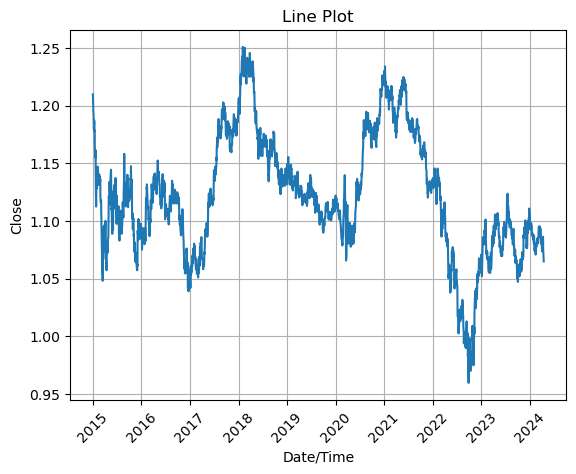

In [19]:
def visualize_line_plot(df, columns_to_plot):

  plt.plot(df.index, df[columns_to_plot])
  plt.xlabel('Date/Time')
  plt.ylabel('Close')
  plt.title(title)
  plt.xticks(rotation=45)  
  plt.grid(True)  
  plt.show()

columns_to_plot = ['Close'] 
title= 'Line Plot'
visualize_line_plot(df.copy(), columns_to_plot) 


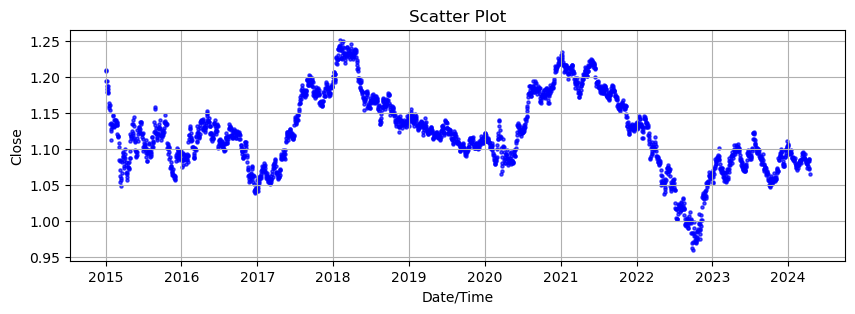

In [20]:
def visualize_scatter_plot(df, y_column, title="Scatter Plot"):

  plt.figure(figsize=(10, 3))  
  plt.scatter(df.index, df[y_column], color='blue', alpha=0.7, s=5) 
  plt.xlabel('Date/Time')
  plt.ylabel(y_column)
  plt.title(title)
  plt.grid(True)
  plt.show()


y_column = 'Close'  
title = 'Scatter Plot'
visualize_scatter_plot(df.copy(), y_column, title)  

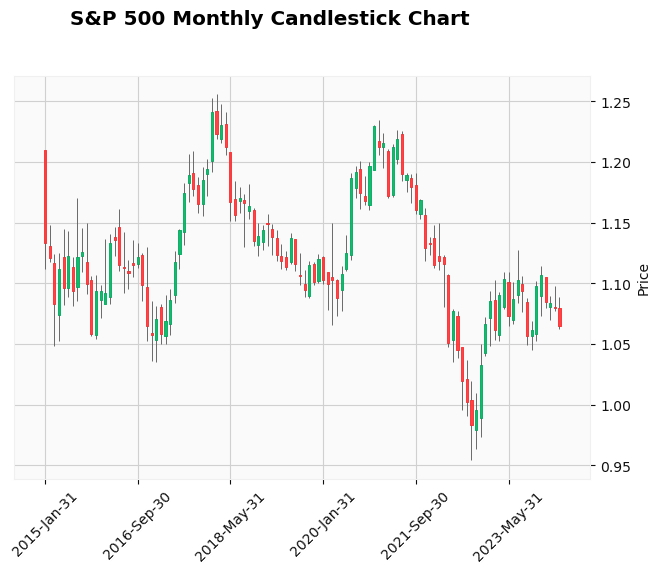

In [21]:
monthly_data = df.resample("M").agg({"Open": "first", "High": "max", "Low": "min", "Close": "last"})

mpf.plot(monthly_data, type="candle", style="yahoo", title="S&P 500 Monthly Candlestick Chart", ylabel="Price")

plt.show()

# Stationarity

>ADF Test

In [22]:
def adf_test(series):
    test_results = adfuller(series)
    print('ADF Statistic: ', test_results[0])
    print('P-Value: ', test_results[1])
    print('Critical Values:')
    for thres, adf_stat in test_results[4].items():
        print('\t%s: %.2f' % (thres, adf_stat))

adf_test(df["Close"][1:])

ADF Statistic:  -2.762047984902418
P-Value:  0.06390276900878326
Critical Values:
	1%: -3.43
	5%: -2.86
	10%: -2.57


P-Value>0.05 therefore the data is not stationary

>Differencing

In [23]:
df['Close'] = df['Close'] - df['Close'].shift(1)
df = df.dropna()

Calculates the difference between each value in the 'Close' column and the value of the 'Close' column in the previous row. It uses the shift() method to shift the 'Close' column by one row, subtracting the previous value from each value in the 'Close' column. This computes the one-step difference of the 'Close' prices. 

df = df.dropna():Since the shift() method creates NaN values in the first row, this line ensures that those rows are removed from the DataFrame.

In [24]:
from statsmodels.tsa.stattools import adfuller

print('Results of ADF Test:')
adftest = adfuller(df['Close'], autolag='AIC')

adfoutput = pd.Series(adftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,Close in adftest[4].items():
    adfoutput['Critical Value (%s)'%key] = 'Close'

print(adfoutput)

if adfoutput['p-value'] < 0.05:
    print("Data is now stationary.")
else:
    print("not stationary.")


Results of ADF Test:
Test Statistic                -21.410802
p-value                              0.0
#Lags Used                           5.0
Number of Observations Used       2413.0
Critical Value (1%)                Close
Critical Value (5%)                Close
Critical Value (10%)               Close
dtype: object
Data is now stationary.


# White Noise

In [25]:
data = df['Close']

result = adfuller(data)

test_statistic = result[0]
p_value = result[1]

if p_value < 0.05:
    print("The dataset has white noise (unit root).")
else:
    print("The dataset does not have white noise (unit root).")


The dataset has white noise (unit root).


White noise is a specific type of time series where the data doesn’t follow a pattern, and each point in the series is independent of others. It’s characterized by three main properties:

Constant Mean: The mean of the series should not be a function of time. Rather, it should be constant throughout the series.

Constant Variance: The variance of the series should not a be a function of time. This property is known as homoscedasticity.

No Autocorrelation: Each value in the series should not be a function of its predecessors. That is, the covariance of the i-th term and the (i+m)-th term should be zero for any ‘m’.

# ACF and PACF

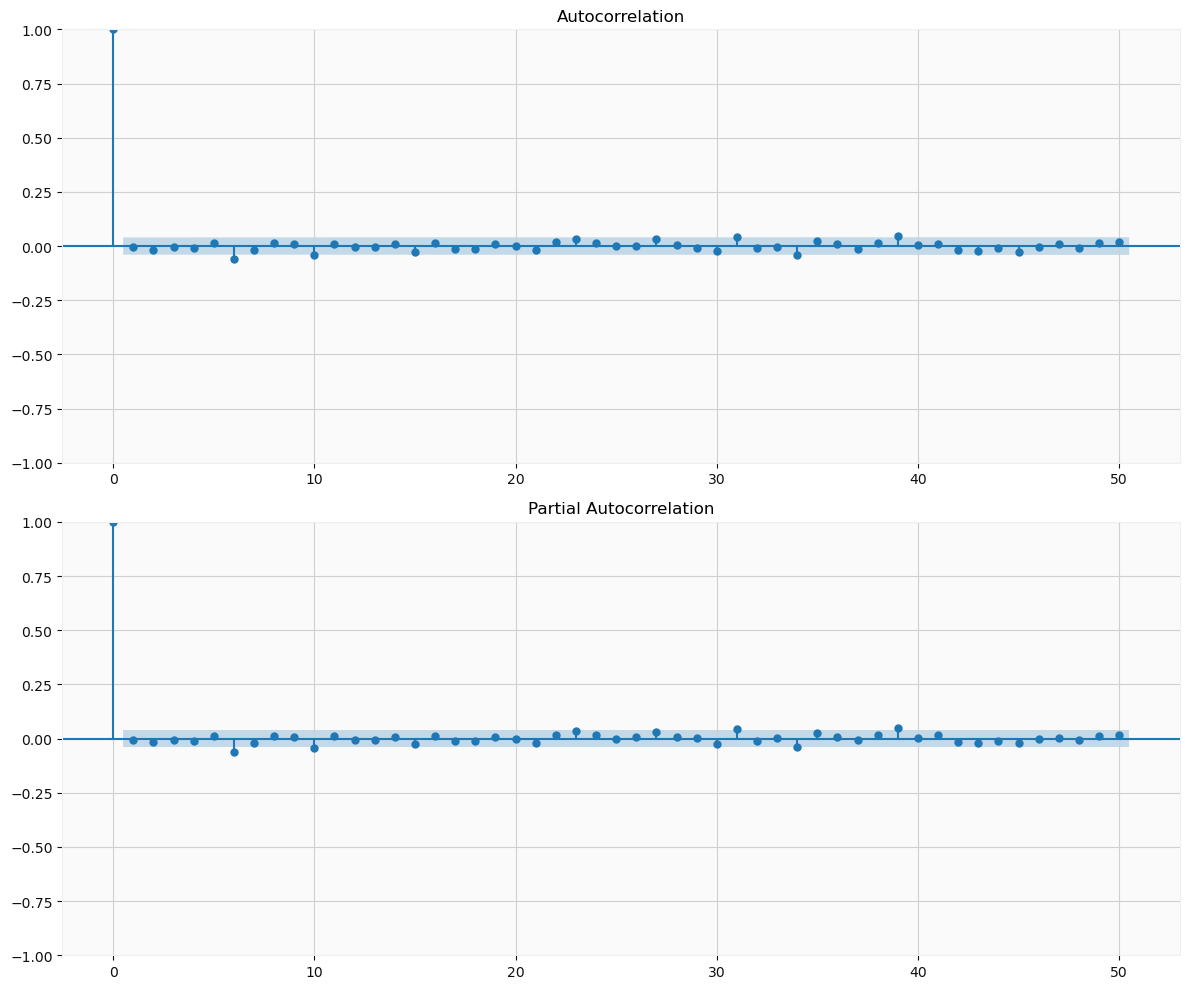

In [26]:
def plot_acf_pacf(df, column='Close', lags=50):
    series = df[column]

    fig, axes = plt.subplots(2, 1, figsize=(12, 10))

    
    axes[0].set_title('ACF')
    plot_acf(series, lags=lags, ax=axes[0])

    
    axes[1].set_title('PACF')
    plot_pacf(series, lags=lags, ax=axes[1])

    plt.tight_layout()
    plt.show()


plot_acf_pacf(df)


# Seasonal Decomposition: Additive

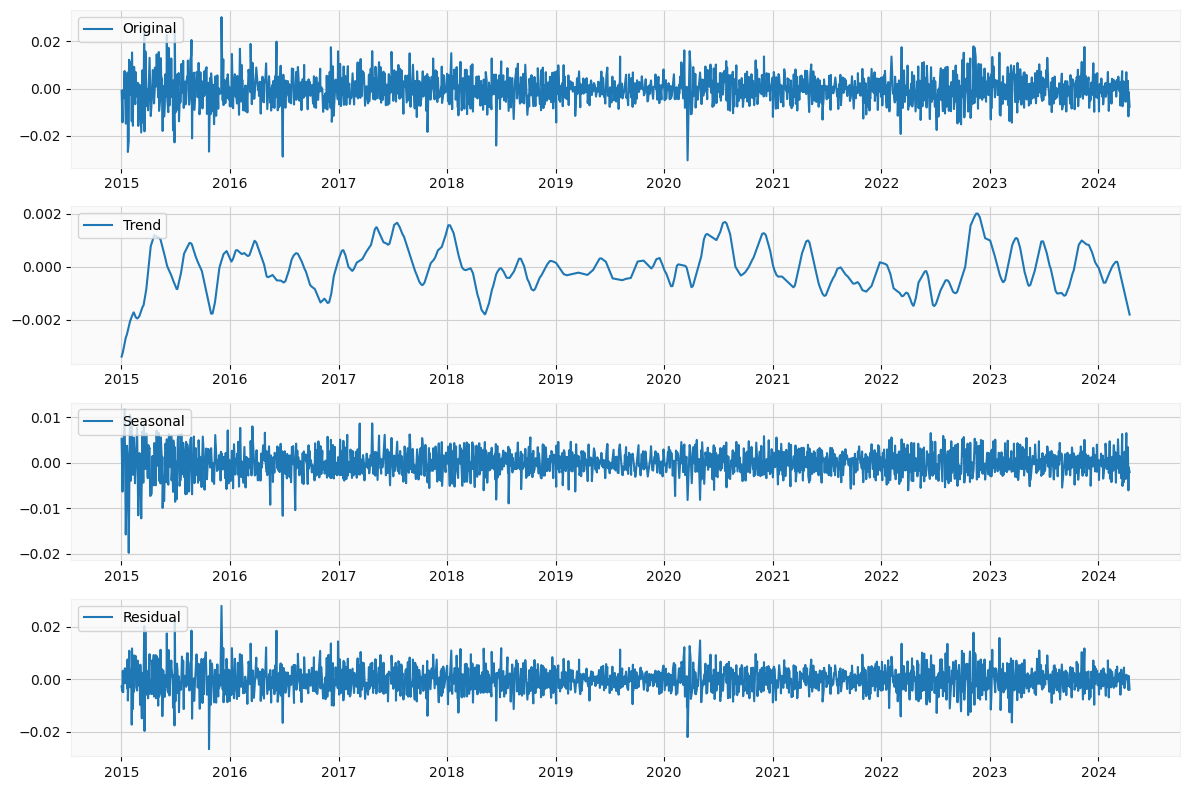

In [27]:
from statsmodels.tsa.seasonal import STL

def plot_components_stl(df, column='Close', period=12):
    stl = STL(df[column], period=period)
    result = stl.fit()

    components = {
        'Original': df[column],
        'Trend': result.trend,
        'Seasonal': result.seasonal,
        'Residual': result.resid
    }

    plt.figure(figsize=(12, 8))
    for i, (label, component) in enumerate(components.items(), start=1):
        plt.subplot(4, 1, i)
        plt.plot(component, label=label)
        plt.legend(loc='upper left')

    plt.tight_layout()
    plt.show()

plot_components_stl(df, period=30)



Trend: This subplot shows the trend component of the decomposition. It represents the long-term movement of the prices without the seasonal fluctuations.

Seasonal: This subplot shows the seasonal component of the decomposition. It represents the cyclical pattern of the prices that repeats over the seasonal period (likely a year in this case).

Residuals: This subplot shows the residuals from the decomposition. These are the remaining fluctuations in the price series that are not explained by the trend and seasonal components.

In [28]:
if df['Close'].min() > 0:
    print("All values in 'value' column are positive.")
else:
    print("There are negative or zero values in the 'value' column.")


There are negative or zero values in the 'value' column.


Due to existing negative/zero values we cannot conduct multiplicative decomposition

# Splitting Data

In [29]:
data=df[[ 'Open', 'High', 'Low', 'Month', 'Year',
        'Series','Close']]

In [30]:
# splitting data into train-test set
#train = data[data['Year'] < 2023]
#test = data[data['Year'] >= 2023]

#train.shape, test.shape

In [31]:
train= data[:70]
test = data[70:]


In [32]:
X_train=train[['Open', 'High', 'Low',  'Month', 'Year',
        'Series']]
y_train=train['Close']
X_test=test[['Open', 'High', 'Low', 'Month', 'Year',
        'Series']]
y_test=test['Close']
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((70, 6), (2349, 6), (70,), (2349,))

In [33]:
# Frequency 'M' for monthly frequency
#train = train.asfreq('M')

# Forecasting Models

## Univariate 

> Exponential Smoothing

In [34]:
target_column=y_test

In [35]:
optimal_alpha = None
best_mse = None
db = df.iloc[:, :].values.astype('float32')
mean_results_for_all_possible_alpha_values = np.zeros(9)
for alpha in range(0, 9):
    pt = np.mean(db[:, 0][0:5])
    mean_for_alpha = np.zeros(len(db))
    mean_for_alpha[0] = np.power(db[0][0] - pt, 2)
    for i in range(1, len(db)):
        pt = pt + ((alpha + 1) * 0.1) * (db[i - 1][0] - pt)
        mean_for_alpha[i] = np.power(db[i][0] - pt, 2)
    mean_results_for_all_possible_alpha_values[alpha] = np.mean(mean_for_alpha)
optimal_alpha = (np.argmin(mean_results_for_all_possible_alpha_values) + 1) * 0.1
best_mse = np.min(mean_results_for_all_possible_alpha_values)
print("Best MSE = %s" % best_mse)
print("Optimal alpha = %s" % optimal_alpha)

Best MSE = 3.1646047574785245e-05
Optimal alpha = 0.9


In [36]:
pt = np.mean(db[:, 0][0:5])
for i in range(1, len(db) + 1):
    pt = pt + optimal_alpha * (db[i - 1][0] - pt)
print("Next observation = %s" % pt)

Next observation = 1.0657616158575205


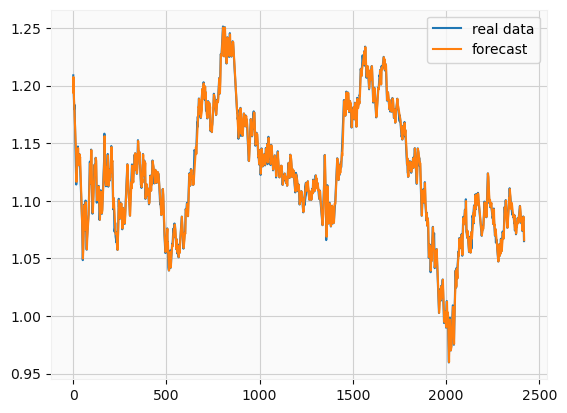

In [37]:
ses_forecast = np.zeros(len(db) + 1)
pt = np.mean(db[:, 0][0:5])
ses_forecast[0] = pt
for i in range(1, len(db) + 1):
    pt = pt + optimal_alpha * (db[i - 1][0] - pt)
    ses_forecast[i] = pt
plt.plot(db[:, 0],label = 'real data')
plt.plot(ses_forecast, label = 'forecast')
plt.legend()
plt.show()

Comparing actual vs. predicted data for the last 30 days

In [39]:
last_30_days_db = target_column [-30:]
last_30_days_ses_forecast = ses_forecast[-30:]

last_30_days_differences = last_30_days_db - last_30_days_ses_forecast
df_results = pd.DataFrame({
    'Actual': last_30_days_db,
    'Forecast': last_30_days_ses_forecast,
    'Difference': last_30_days_differences
})
df_results

,Actual,Forecast,Difference
Date,,,
2024-03-05,0.001248,1.085358,-1.084110
2024-03-06,0.000082,1.085575,-1.085493
2024-03-07,0.004354,1.089516,-1.085162
2024-03-08,0.005061,1.094465,-1.089404
2024-03-11,-0.000719,1.094312,-1.095031
2024-03-12,-0.001160,1.093253,-1.094413
2024-03-13,-0.000358,1.092824,-1.093183
2024-03-14,0.002753,1.095260,-1.092506
2024-03-15,-0.007190,1.089033,-1.096222


Calculating Accuracy

In [40]:
rmse = sqrt(mean_squared_error(db[:, 0], ses_forecast[1:]))

mse = mean_squared_error(db[:, 0], ses_forecast[1:])

r2 = r2_score(db[:, 0], ses_forecast[1:])

print("RMSE:", rmse)
print("MSE:", mse)
print("R-squared:", r2)


RMSE: 0.0005625481985997747
MSE: 3.1646047574785163e-07
R-squared: 0.9998865267895999


> Forecast by Moving Average

In [55]:
train['moving_avg'] = train['Close'].rolling(window=5).mean()
test['moving_avg'] = train['moving_avg'].iloc[-1]

/var/folders/zt/07dxscw52vz1wc07944vy0d40000gr/T/ipykernel_40442/827541096.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['moving_avg'] = train['Close'].rolling(window=5).mean()
/var/folders/zt/07dxscw52vz1wc07944vy0d40000gr/T/ipykernel_40442/827541096.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['moving_avg'] = train['moving_avg'].iloc[-1]


Comparing actual vs. predicted data for the last 30 days

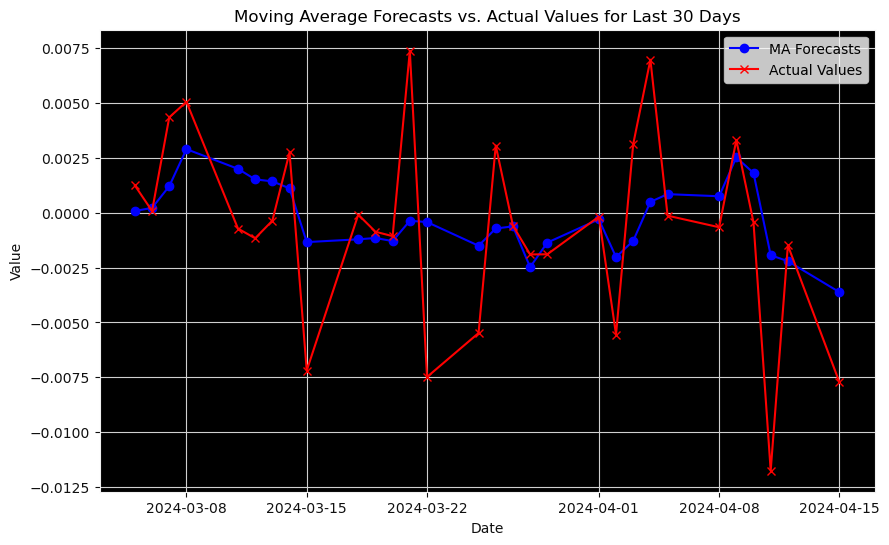

In [64]:
ma_forecasts_last_30_days = moving_avg[-30:]
actual_values_last_30_days = test['Close'].tail(30)

plt.figure(figsize=(10, 6))
plt.plot(ma_forecasts_last_30_days.index, ma_forecasts_last_30_days, label='MA Forecasts', marker='o', color='blue')
plt.plot(actual_values_last_30_days.index, actual_values_last_30_days, label='Actual Values', marker='x', color='red')
plt.title('Moving Average Forecasts vs. Actual Values for Last 30 Days')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.gca().set_facecolor('black')
plt.show()


In [99]:
last_30_days_db = target_column[-30:]
last_30_days_ma_forecast = moving_avg[-30:]

last_30_days_differences = last_30_days_db - last_30_days_ma_forecast

df_results = pd.DataFrame({
    'Actual': last_30_days_db,
    'Forecast': last_30_days_ma_forecast,
    'Difference': last_30_days_differences
})

print(df_results)



              Actual  Forecast  Difference
Date                                      
2024-03-05  0.001248  0.000085    0.001163
2024-03-06  0.000082  0.000224   -0.000141
2024-03-07  0.004354  0.001214    0.003140
2024-03-08  0.005061  0.002903    0.002157
2024-03-11 -0.000719  0.002005   -0.002724
2024-03-12 -0.001160  0.001524   -0.002684
2024-03-13 -0.000358  0.001435   -0.001794
2024-03-14  0.002753  0.001115    0.001638
2024-03-15 -0.007190 -0.001335   -0.005855
2024-03-18 -0.000083 -0.001208    0.001125
2024-03-19 -0.000864 -0.001148    0.000284
2024-03-20 -0.001063 -0.001289    0.000226
2024-03-21  0.007390 -0.000362    0.007752
2024-03-22 -0.007485 -0.000421   -0.007064
2024-03-25 -0.005482 -0.001501   -0.003982
2024-03-26  0.003069 -0.000714    0.003783
2024-03-27 -0.000587 -0.000619    0.000032
2024-03-28 -0.001898 -0.002477    0.000579
2024-03-29 -0.001891 -0.001358   -0.000533
2024-04-01 -0.000175 -0.000296    0.000122
2024-04-02 -0.005551 -0.002020   -0.003531
2024-04-03 

Calculating Accuracy

In [89]:
import pandas as pd

# Assuming actual is your actual data and moving_avg is your moving average predictions

# Remove NaN values from moving_avg and align with actual
aligned_moving_avg = moving_avg.dropna()
aligned_actual = actual.loc[aligned_moving_avg.index]

# Now, aligned_moving_avg and aligned_actual have the same index and no NaN values


In [97]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming actual and moving_avg are your arrays/lists
# Find indices of NaN values in either array
nan_indices = np.isnan(actual) | np.isnan(moving_avg)

# Remove NaN values from both arrays using the indices
actual_cleaned = actual[~nan_indices]
moving_avg_cleaned = moving_avg[~nan_indices]

# Calculate metrics
rmse = np.sqrt(mean_squared_error(actual_cleaned, moving_avg_cleaned))
mse = mean_squared_error(actual_cleaned, moving_avg_cleaned)
r2 = r2_score(actual_cleaned, moving_avg_cleaned)

print("RMSE:", rmse)
print("MSE:", mse)
print("R2:", r2)



RMSE: 0.005035661846650999
MSE: 2.5357890233816543e-05
R2: 0.19221656939870224


> Forecast by ARIMA

In [150]:
order = (13, 1, 0)
# Fit ARIMA model
ARIMA_model = ARIMA(train['Close'].values, order=order)
ARIMA_model_fit = ARIMA_model.fit()

# Summary of the model
ARIMA_model_fit.summary()

/Users/mahmoud/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   70
Model:                ARIMA(13, 1, 0)   Log Likelihood                 221.583
Date:                Tue, 23 Apr 2024   AIC                           -415.166
Time:                        04:10:55   BIC                           -383.889
Sample:                             0   HQIC                          -402.758
                                 - 70                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0635      0.115     -9.273      0.000      -1.288      -0.839
ar.L2         -0.9333      0.166     -5.618      0.000      -1.259      -0.608
ar.L3         -0.8267      0.180     -4.596      0.000      -1.179      -0.474
ar.L4         -0.6954      0.208     -3.340      0.001      -1.104      -0.287
ar.L5         -0.4026      0.259     -1.553      0.120      -0.911       0.105
ar.L6         -0.3426      0.278     -1.234      0.217      -0.887       0.202
ar.L7         -0.4091      0.283     -1.447      0.148      -0.963       0.145
ar.L8         -0.4450      0.297     -1.498      0.134      -1.027       0.137
ar.L9         -0.4131      0.326     -1.268      0.205      -1.052       0.226
ar.L10        -0.5410      0.339     -1.594      0.111      -1.206       0.124
ar.L11        -0.3602      0.343     -1.051      0.293      -1.032       0.312
ar.L12        -0.1642      0.315     -0.522      0.602      -0.781       0.453
ar.L13        -0.0776      0.164     -0.473      0.636      -0.399       0.244
sigma2      9.128e-05   2.06e-05      4.438      0.000     5.1e-05       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 0.41
Prob(Q):                              0.92   Prob(JB):                         0.81
Heteroskedasticity (H):               1.44   Skew:                             0.19
Prob(H) (two-sided):                  0.39   Kurtosis:                         3.04
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [151]:
ARIMA_forecast = ARIMA_model_fit.forecast(steps=len(test))

In [152]:
rmse = sqrt(mean_squared_error(test['Close'], ARIMA_forecast))
print(f"RMSE: {rmse:.2f}") 

RMSE: 0.01


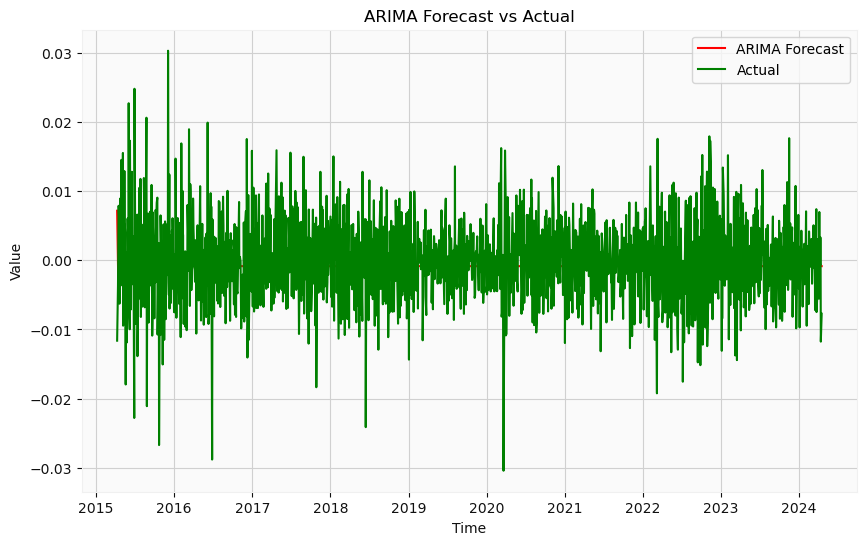

In [153]:
# Plot actual vs forecast
plt.figure(figsize=(10, 6))
# plt.plot(train['Close'], label='Training Data')
plt.plot(test.index, ARIMA_forecast, color='red', label='ARIMA Forecast')
plt.plot(test.index, test['Close'], color='green', label='Actual')
plt.title('ARIMA Forecast vs Actual')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()


Comparing actual vs. predicted data for the last 30 days

In [154]:
last_30_days_actual=test['Close'][-30:].values
last_30_days_arima_forecast=ARIMA_forecast[-30:]
# Calculate the differences between actual and ARIMA forecasted values
last_30_days_differences = last_30_days_actual - last_30_days_arima_forecast

# Create a DataFrame to display the results
df_ARIMAtable = pd.DataFrame({
    'Actual': last_30_days_actual,
    'Forecast': last_30_days_arima_forecast,
    'Difference': last_30_days_differences
})

# Print the DataFrame
df_ARIMAtable

,Actual,Forecast,Difference
0,0.001248,-0.000849,0.002097
1,0.000082,-0.000849,0.000931
2,0.004354,-0.000849,0.005203
3,0.005061,-0.000849,0.005910
4,-0.000719,-0.000849,0.000130
5,-0.001160,-0.000849,-0.000311
6,-0.000358,-0.000849,0.000491
7,0.002753,-0.000849,0.003602
8,-0.007190,-0.000849,-0.006341
9,-0.000083,-0.000849,0.000766


In [155]:
rmse = sqrt(mean_squared_error(last_30_days_actual, last_30_days_arima_forecast))
print(f"RMSE: {rmse:.2f}") 

RMSE: 0.00


## Multivariate

>SARIMAX

In [156]:
SARIMAX_model = pm.auto_arima(y_train, X_train, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=20, max_q=20, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=False)   # Disable stepwise search

SARIMAX_model.summary()

 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-213.442, Time=0.10 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-439.891, Time=0.10 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=-437.932, Time=0.27 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=-435.714, Time=0.30 sec
 ARIMA(0,0,4)(0,0,0)[0]             : AIC=-434.055, Time=0.12 sec
 ARIMA(0,0,5)(0,0,0)[0]             : AIC=-434.070, Time=0.34 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-439.928, Time=0.11 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-437.961, Time=0.15 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-435.673, Time=0.15 sec


/Users/mahmoud/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Users/mahmoud/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(1,0,3)(0,0,0)[0]             : AIC=-433.749, Time=0.46 sec
 ARIMA(1,0,4)(0,0,0)[0]             : AIC=-432.057, Time=0.18 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=-438.147, Time=0.30 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-436.113, Time=0.35 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-431.710, Time=0.13 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=-432.765, Time=0.41 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=-436.139, Time=0.44 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=-434.114, Time=0.55 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=-431.749, Time=0.18 sec


/Users/mahmoud/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Users/mahmoud/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(4,0,0)(0,0,0)[0]             : AIC=-434.180, Time=0.22 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=-432.130, Time=0.25 sec
 ARIMA(5,0,0)(0,0,0)[0]             : AIC=-433.288, Time=0.46 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0]          
Total fit time: 5.615 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   70
Model:               SARIMAX(1, 0, 0)   Log Likelihood                 227.964
Date:                Tue, 23 Apr 2024   AIC                           -439.928
Time:                        04:11:12   BIC                           -421.940
Sample:                    01-02-2015   HQIC                          -432.783
                         - 04-09-2015                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Open           0.2168      0.253      0.857      0.391      -0.279       0.713
High           0.1471      0.301      0.489      0.625      -0.442       0.737
Low           -0.2081      0.167     -1.249      0.212      -0.535       0.118
Month         -0.0021      0.004     -0.475      0.634      -0.011       0.006
Year       -9.399e-05   4.22e-05     -2.228      0.026      -0.000   -1.13e-05
Series         0.0004      0.000      1.514      0.130      -0.000       0.001
ar.L1         -0.0379      0.108     -0.352      0.725      -0.249       0.173
sigma2      8.811e-05    1.7e-05      5.195      0.000    5.49e-05       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 0.43
Prob(Q):                              0.99   Prob(JB):                         0.81
Heteroskedasticity (H):               1.18   Skew:                             0.15
Prob(H) (two-sided):                  0.69   Kurtosis:                         2.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [160]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
SARIMAX= SARIMAX(y_train, X_train, order=(5,0,0))
model_sarimax= SARIMAX.fit()

# Make predictions
predictions_sarimax = model_sarimax.predict(start=0, end=len(X_test)-1, exog=X_test, typ='levels')

model_sarimax.summary()

/Users/mahmoud/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/Users/mahmoud/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           12     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.26633D+00    |proj g|=  1.81142D+05



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/mahmoud/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   12      2     50      2     0     0   1.798D+05  -3.266D+00
  F =  -3.2663449894927314     

ABNORMAL_TERMINATION_IN_LNSRCH                              


ValueError: Provided exogenous values are not of the appropriate shape. Required (2279, 6), got (2349, 6).

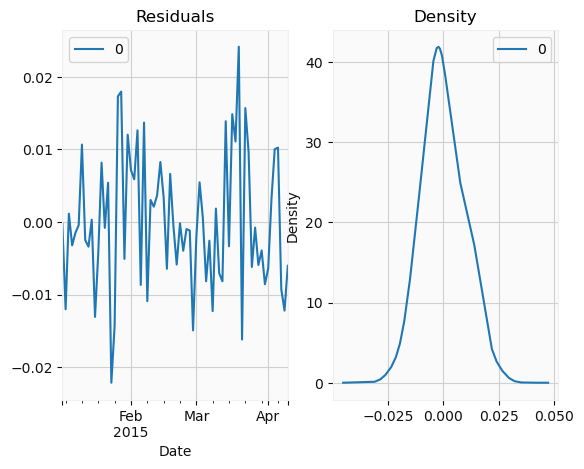

In [161]:
# Plot residual errors
residuals = pd.DataFrame(model_sarimax.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

In [163]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions_sarimax))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions_sarimax))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions_sarimax)))

NameError: name 'predictions_sarimax' is not defined

Actual vs. Predicted

In [ ]:
df_SARIMAXResults = pd.DataFrame({'actual':y_test.values, 'predicted':predictions_sarimax})
df_SARIMAXResults .head()

>LSTM

In [ ]:
# Define LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(50, activation='relu', input_shape=(X_train.shape[1], 1)))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer='adam', loss='mse')

In [ ]:
lstm_model.summary()

In [ ]:
X_train_array = X_train.values.reshape(X_train.shape[0], X_train.shape[1], 1)  # Convert to NumPy array and reshape

In [ ]:
# Train LSTM model
lstm_model.fit(X_train, y_train, epochs=50, verbose=1)


In [ ]:
# Use LSTM model to make predictions
test_preds_lstm = lstm_model.predict(X_test)

In [ ]:
test_preds_lstm

Accuracy

In [ ]:
mse = mean_squared_error(y_test,test_preds_lstm)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, test_preds_lstm)

print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R2 Score: {r2}")


> XGBOOST

In [ ]:
# Define XGBoost model
xgb_model = XGBRegressor(n_estimators=1000, learning_rate=0.05)

In [ ]:
# Train XGBoost model
xgb_model.fit(X_train, y_train, early_stopping_rounds=5, eval_set=[(X_test, y_test)], verbose=False)

In [ ]:
# Use XGBoost model to make predictions
test_preds_xgb = xgb_model.predict(X_test)

Accuracy

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

rmse_test = mean_squared_error(y_test, test_preds_xgb, squared=False)
mse_test = mean_squared_error(y_test, test_preds_xgb)
r2_test = r2_score(y_test, test_preds_xgb)

# Print the results

print("Test RMSE:", rmse_test)
print("Test MSE:", mse_test)
print("Test R2:", r2_test)



# HYBRID MODEL: LSTM-XGBoost Hybrid Stock Forecasting

In [ ]:
xgb_test_preds = xgb_model.predict(X_test)

lstm_test_preds = lstm_model.predict(test_preds_lstm )

# Combine the predictions of the XGBoost and LSTM models
hybrid_preds = []
for i in range(len(y_test)):
    hybrid_preds.append(0.5 * (xgb_test_preds[i] + lstm_test_preds[i]))

# Evaluate the hybrid model
print("Hybrid Model Evaluation:")
print("Test Data RMSE:", np.sqrt(mean_squared_error(y_test, hybrid_preds)))

# HYBRID MODEL: SARIMAX and XGBOOST

In [ ]:
sarimax_test_preds = model_sarimax.predict(n_periods=len(X_test), exogenous=X_test)

xgb_test_preds = xgb_model.predict(X_test)

hybrid_preds = []

for i in range(len(X_test)):
    hybrid_preds.append(0.5 * (xgb_test_preds[i] + sarimax_test_preds[i]))

print("Hybrid Model Evaluation:")
print("Test Data RMSE:", np.sqrt(mean_squared_error(y_test, hybrid_preds)))
